In [62]:
# Este colab forma parte del video de Redes Neuronales Convolucionales del canal de Youtube "Ringa Tech"
# https://youtu.be/eGDSlW93Bng
import tensorflow as tf
import tensorflow_datasets as tfds

#Descargar set de datos de MNIST (Numeros escritos a mano, etiquetados)
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

#Obtener en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

#Funcion de normalizacion para los datos (Pasar valor de los pixeles de 0-255 a 0-1)
#(Hace que la red aprenda mejor y mas rapido)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui se pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)
ds=datos_pruebas
#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()
d=datos_pruebas
clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

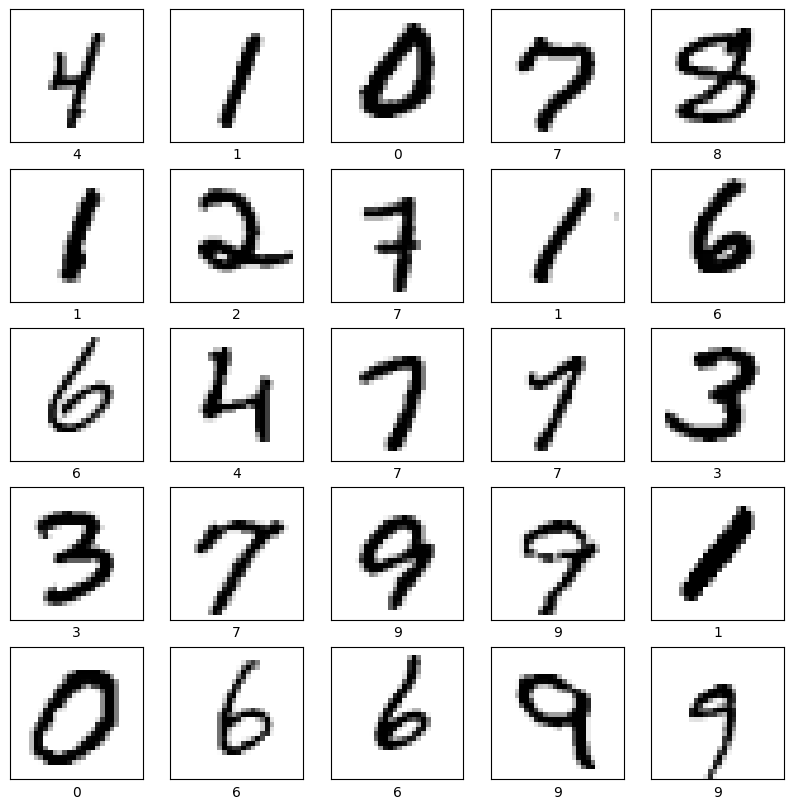

In [63]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show()  

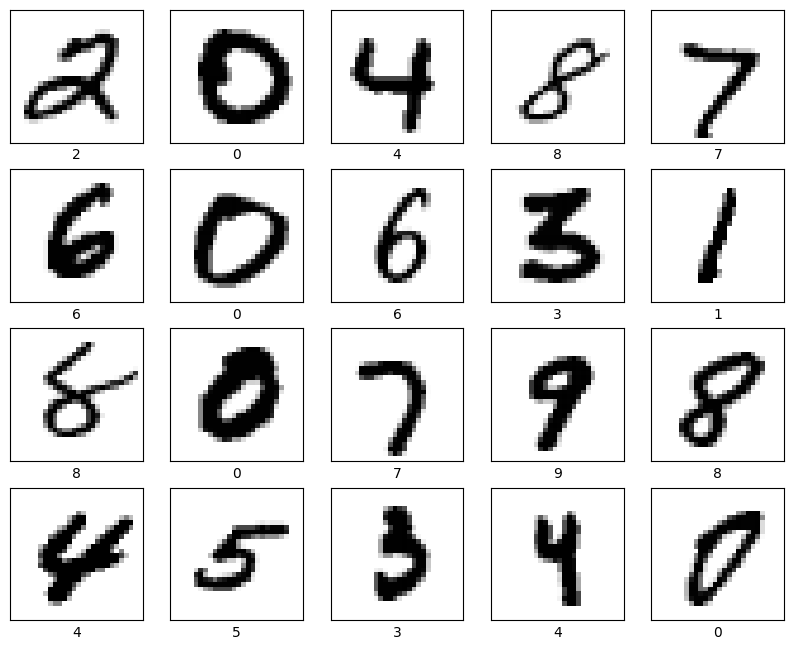

In [64]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(d.take(20)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show() 

In [65]:
#Crear el modelo (Modelo denso, regular, sin redes convolucionales todavia)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 = blanco y negro
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [66]:
#Los numeros de datos de entrenamiento y pruebas (60k y 10k)
num_datos_entrenamiento = metadatos.splits["train"].num_examples
num_datos_pruebas = metadatos.splits["test"].num_examples

#Trabajar por lotes
TAMANO_LOTE=32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
#Realizar el entrenamiento
import math

historial = modelo.fit(
    datos_entrenamiento,
    epochs=1000,
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE)
)

Epoch 1/1000
1875/1875 [==============================] - 8s 2ms/step - loss: 0.2894 - accuracy: 0.9149
Epoch 2/1000
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1269 - accuracy: 0.9617
Epoch 3/1000
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0958 - accuracy: 0.9707
Epoch 4/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0791 - accuracy: 0.9760
Epoch 5/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0651 - accuracy: 0.9798
Epoch 6/1000
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0576 - accuracy: 0.9810
Epoch 7/1000
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0510 - accuracy: 0.9843
Epoch 8/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0457 - accuracy: 0.9853
Epoch 9/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0386 - accuracy: 0.9870
Epoch 10/1000
1875/1875 [==============================] - 3s 1m

In [ ]:
#Exportar el modelo al explorador! (Mas detalle de esto en en mi video de exportacion: https://youtu.be/JpE4bYyRADI )
modelo.save('num_mnist.h5')



In [ ]:
predictions = modelo.predict(datos_pruebas.take(50))


50/50 [==============================] - 0s 3ms/step


In [ ]:
sw=predictions[0]


In [ ]:
sw

array([0.        , 0.        , 0.99999994, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [ ]:
a = sw.argmax()

In [ ]:
a

2

In [ ]:
predictions.shape

(1600, 10)

In [ ]:
sw1=predictions[13]


In [ ]:
a = sw1.argmax()

In [ ]:
a

9

In [ ]:
sw2=predictions[10]

In [ ]:
sw2.argmax()

8

#Buscar en internet la imagen de un número. Tratarlos y predicir cuál es.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import tensorflow as tf
from skimage.transform import resize


In [ ]:
numero='6.jpg'
x = load_img(numero, target_size=(28,28))
  
x = img_to_array(x)
  
x = np.expand_dims(x, axis=0)

In [ ]:
X = np.array(x, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')#convierto a float32
test_X = test_X / 255. #normalizo a 0-1
test_X=tf.image.rgb_to_grayscale(test_X)

In [ ]:
test_X.shape

TensorShape([1, 28, 28, 1])

In [ ]:
predicted_classes = modelo.predict(test_X)

1/1 [==============================] - 0s 46ms/step


In [ ]:
predicted_classes.argmax()

3